In [1]:
import matplotlib.pyplot as plt

plt.rc("font", size=14)
plt.rc("axes", labelsize=14, titlesize=14)
plt.rc("legend", fontsize=14)
plt.rc("xtick", labelsize=10)
plt.rc("ytick", labelsize=10)

# Support Vector Machine
SVM is a powerful and versatile machine learning model, capable of performing linear and nonlinear classification, regression, and even novelty detection. SVMs shine with small to medium-sized nonlinear datasets (i.e., hundreds to thousands of instances), especially for classification tasks. However, they don't scale very well to very large datasets.

## Linear SVM Classification

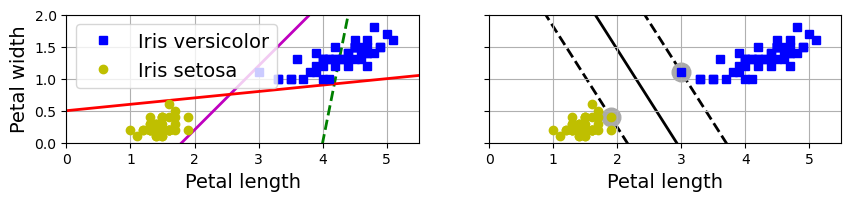

In [9]:
import numpy as np
from sklearn.svm import SVC
from sklearn import datasets

iris = datasets.load_iris(as_frame=True)
X = iris.data[["petal length (cm)", "petal width (cm)"]].values
y = iris.target

setosa_or_versicolor = (y == 0) | (y == 1)
X = X[setosa_or_versicolor]
y = y[setosa_or_versicolor]

# SVM Classifier Model
svm_clf = SVC(kernel="linear", C=1e100)
svm_clf.fit(X, y)

# Bad Models
x0 = np.linspace(0, 5.5, 200)
pred1 = 5*x0 - 20
pred2 = x0 - 1.8
pred3 = 0.1*x0 + 0.5

def plot_svc_decision_boundary(svm_clf, xmin, xmax):
    w = svm_clf.coef_[0]
    b = svm_clf.intercept_[0]

    # At the decision boundary, w0*x0 + w1*x1 + b = 0
    # => x1 = -w0/w1*x0 - b/w1
    x0 = np.linspace(xmin, xmax, 200)
    decision_boundary = -w[0]/w[1]*x0 - b/w[1]

    margin = 1/w[1]
    gutter_up = decision_boundary + margin
    gutter_down = decision_boundary - margin
    svs = svm_clf.support_vectors_

    plt.plot(x0, decision_boundary, "k-", linewidth=2, zorder=-2)
    plt.plot(x0, gutter_up, "k--", linewidth=2, zorder=-2)
    plt.plot(x0, gutter_down, "k--", linewidth=2, zorder=-2)
    plt.scatter(svs[:, 0], svs[:, 1], s=180, facecolors="#AAA", zorder=-1)

fig, axes = plt.subplots(ncols=2, figsize=(10, 2.7), sharey=True)

plt.sca(axes[0])
plt.plot(x0, pred1, "g--", linewidth=2)
plt.plot(x0, pred2, "m-", linewidth=2)
plt.plot(x0, pred3, "r-", linewidth=2)
plt.plot(X[:, 0][y==1], X[:, 1][y==1], "bs", label="Iris versicolor")
plt.plot(X[:, 0][y==0], X[:, 1][y==0], "yo", label="Iris setosa")
plt.xlabel("Petal length")
plt.ylabel("Petal width")
plt.legend(loc="upper left")
plt.axis([0, 5.5, 0,2])
plt.gca().set_aspect("equal")
plt.grid()

plt.sca(axes[1])
plot_svc_decision_boundary(svm_clf, 0, 5.5)
plt.plot(X[:, 0][y==1], X[:, 1][y==1], "bs")
plt.plot(X[:, 0][y==0], X[:, 1][y==0], "yo")
plt.xlabel("Petal length")
plt.axis([0, 5.5, 0, 2])
plt.gca().set_aspect("equal")
plt.grid()

plt.show()

The two classes can clearly be separated easily with a straight line (*linearly separable*).
* The left plot shows the decision boundaries of three possible linear classifier. The model whose decision boundary is represented by the dashed line is so bad that it doesn't even separate the classes properly. The other two models work perfectly on this training set, but their decision boundaries come so close to the instances that these models will probably not perform as well on new instances.
* In contrast, the solid line in the plot on the right represents the decision boundary of an SVM classifier
    * This line not only separates the two classes but also stays as far away from the closest training instances as possible
    * You can think SVM classifier as fitting the widest possible street (represented by the parallel dashed lines) between the classes. This is called *large margin classification*
* Adding more training instances "off the street" will not affect the decision boundary at all. It is fully determined by the instances located on the edge of the street. These instances are called the *support vectors*.

**NOTE:** SVMs are sensitive to the feature scales. 

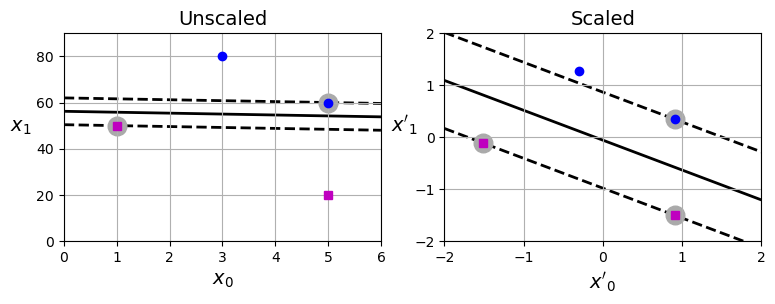

In [10]:
from sklearn.preprocessing import StandardScaler

Xs = np.array([[1, 50], [5, 20], [3, 80], [5, 60]]).astype(np.float64)
ys = np.array([0, 0, 1, 1])
svm_clf = SVC(kernel="linear", C=100).fit(Xs, ys)

scaler = StandardScaler()
X_scaled = scaler.fit_transform(Xs)
svm_clf_scaled = SVC(kernel="linear", C=100).fit(X_scaled, ys)

plt.figure(figsize=(9, 2.7))
plt.subplot(121)
plt.plot(Xs[:, 0][ys==1], Xs[:, 1][ys==1], "bo")
plt.plot(Xs[:, 0][ys==0], Xs[:, 1][ys==0], "ms")
plot_svc_decision_boundary(svm_clf, 0, 6)
plt.xlabel("$x_0$")
plt.ylabel("$x_1$    ", rotation=0)
plt.title("Unscaled")
plt.axis([0, 6, 0, 90])
plt.grid()

plt.subplot(122)
plt.plot(X_scaled[:, 0][ys==1], X_scaled[:, 1][ys==1], "bo")
plt.plot(X_scaled[:, 0][ys==0], X_scaled[:, 1][ys==0], "ms")
plot_svc_decision_boundary(svm_clf_scaled, -2, 2)
plt.xlabel("$x'_0$")
plt.ylabel("$x'_1$  ", rotation=0)
plt.title("Scaled")
plt.axis([-2, 2, -2, 2])
plt.grid()

plt.show()

### Softmax Margin Classification
**Hard Margin Classification:** strictly impose that all instances must be off the street and on the correct side.\
There are two issues with hard margin classification:
1. It only works if the data is linearly separable
2. It is sensitive to outliers

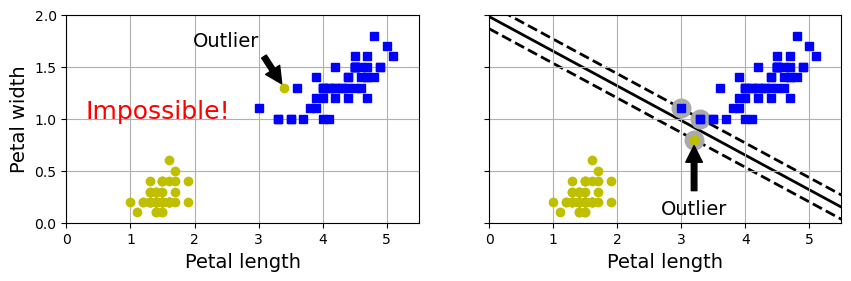

In [11]:
X_outliers = np.array([[3.4, 1.3], [3.2, 0.8]])
y_outliers = np.array([0, 0])
Xo1 = np.concatenate([X, X_outliers[:1]], axis=0)
yo1 = np.concatenate([y, y_outliers[:1]], axis=0)
Xo2 = np.concatenate([X, X_outliers[1:]], axis=0)
yo2 = np.concatenate([y, y_outliers[1:]], axis=0)

svm_clf2 = SVC(kernel="linear", C=10**9)
svm_clf2.fit(Xo2, yo2)

fig, axes = plt.subplots(ncols=2, figsize=(10, 2.7), sharey=True)

plt.sca(axes[0])
plt.plot(Xo1[:, 0][yo1==1], Xo1[:, 1][yo1==1], "bs")
plt.plot(Xo1[:, 0][yo1==0], Xo1[:, 1][yo1==0], "yo")
plt.text(0.3, 1.0, "Impossible!", color="red", fontsize=18)
plt.xlabel("Petal length")
plt.ylabel("Petal width")
plt.annotate(
    "Outlier",
    xy=(X_outliers[0][0], X_outliers[0][1]),
    xytext=(2.5, 1.7),
    ha="center",
    arrowprops=dict(facecolor='black', shrink=0.1),
)
plt.axis([0, 5.5, 0, 2])
plt.grid()

plt.sca(axes[1])
plt.plot(Xo2[:, 0][yo2==1], Xo2[:, 1][yo2==1], "bs")
plt.plot(Xo2[:, 0][yo2==0], Xo2[:, 1][yo2==0], "yo")
plot_svc_decision_boundary(svm_clf2, 0, 5.5)
plt.xlabel("Petal length")
plt.annotate(
    "Outlier",
    xy=(X_outliers[1][0], X_outliers[1][1]),
    xytext=(3.2, 0.08),
    ha="center",
    arrowprops=dict(facecolor='black', shrink=0.1),
)
plt.axis([0, 5.5, 0, 2])
plt.grid()

plt.show()

* On the left side, it is impossible to find a hard margin
* On the right side, the decision boundary ends up very different from the one without the outlier, and the model will probably not generalize as well

**Soft Margin Classification:** find a good balance between keeping the street as large as possible and limiting the *margin violation* (i.e., instance that end up in the middle of the street or even on the wrong side)\
When creating an SVM model using Scikit-learn, you can specify several hyperparameters, including the regularization hyperparameter $C$

In [12]:
import numpy as np
from sklearn.datasets import load_iris
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import LinearSVC

iris = load_iris(as_frame=True)
X = iris.data[["petal length (cm)", "petal width (cm)"]].values
y = (iris.target == 2)  # Iris virginica

svm_clf = make_pipeline(StandardScaler(),
                        LinearSVC(C=1, dual=True, random_state=42))
svm_clf.fit(X, y)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('linearsvc', LinearSVC(C=1, dual=True, random_state=42))])

In [13]:
X_new = [[5.5, 1.7], [5.0, 1.5]]
svm_clf.predict(X_new)

array([ True, False])

In [14]:
svm_clf.decision_function(X_new)

array([ 0.66163411, -0.22036063])

These measure the signed distance between each instance and the decision boundary

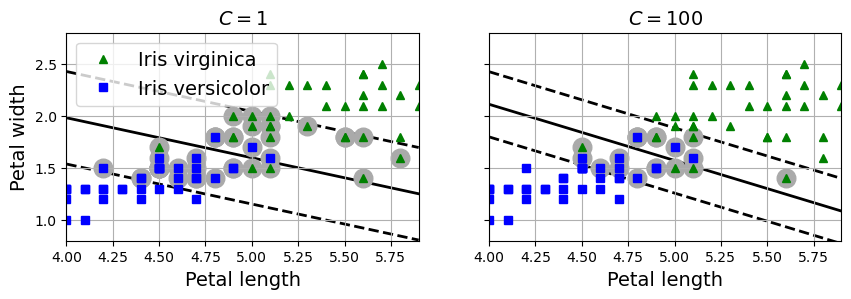

In [16]:
scaler = StandardScaler()
svm_clf1 = LinearSVC(C=1, max_iter=10_000, dual=True, random_state=42)
svm_clf2 = LinearSVC(C=100, max_iter=10_000, dual=True, random_state=42)

scaled_svm_clf1 = make_pipeline(scaler, svm_clf1)
scaled_svm_clf2 = make_pipeline(scaler, svm_clf2)

scaled_svm_clf1.fit(X, y)
scaled_svm_clf2.fit(X, y)

# Convert to unscaled parameters
b1 = svm_clf1.decision_function([-scaler.mean_ / scaler.scale_])
b2 = svm_clf2.decision_function([-scaler.mean_ / scaler.scale_])
w1 = svm_clf1.coef_[0] / scaler.scale_
w2 = svm_clf2.coef_[0] / scaler.scale_
svm_clf1.intercept_ = np.array([b1])
svm_clf2.intercept_ = np.array([b2])
svm_clf1.coef_ = np.array([w1])
svm_clf2.coef_ = np.array([w2])

# Find support vectors (LinearSVC does not do this automatically)
t = y * 2 - 1
support_vectors_idx1 = (t * (X.dot(w1) + b1) < 1).to_numpy()
support_vectors_idx2 = (t * (X.dot(w2) + b2) < 1).to_numpy()
svm_clf1.support_vectors_ = X[support_vectors_idx1]
svm_clf2.support_vectors_ = X[support_vectors_idx2]

fig, axes = plt.subplots(ncols=2, figsize=(10, 2.7), sharey=True)

plt.sca(axes[0])
plt.plot(X[:, 0][y==1], X[:, 1][y==1], "g^", label="Iris virginica")
plt.plot(X[:, 0][y==0], X[:, 1][y==0], "bs", label="Iris versicolor")
plot_svc_decision_boundary(svm_clf1, 4, 5.9)
plt.xlabel("Petal length")
plt.ylabel("Petal width")
plt.legend(loc="upper left")
plt.title(f"$C = {svm_clf1.C}$")
plt.axis([4, 5.9, 0.8, 2.8])
plt.grid()

plt.sca(axes[1])
plt.plot(X[:, 0][y==1], X[:, 1][y==1], "g^")
plt.plot(X[:, 0][y==0], X[:, 1][y==0], "bs")
plot_svc_decision_boundary(svm_clf2, 4, 5.99)
plt.xlabel("Petal length")
plt.title(f"$C = {svm_clf2.C}$")
plt.axis([4, 5.9, 0.8, 2.8])
plt.grid()

plt.show()

By reducing $C$, it makes the street larger, but it also leads to more margin violations. In other words, reducing $C$ results in more instances supporting the street, so there's less risk of overfitting. But if you reduce it too much, then the model ends up underfitting.\
The model with $C=100$ looks like it will generalize better than the one with $C=1$

## Nonlinear SVM Classification
One approach to handling nonlinear datasets is to add more features, such as polynomial features. In some cases, this can result in a linearly separable dataset.

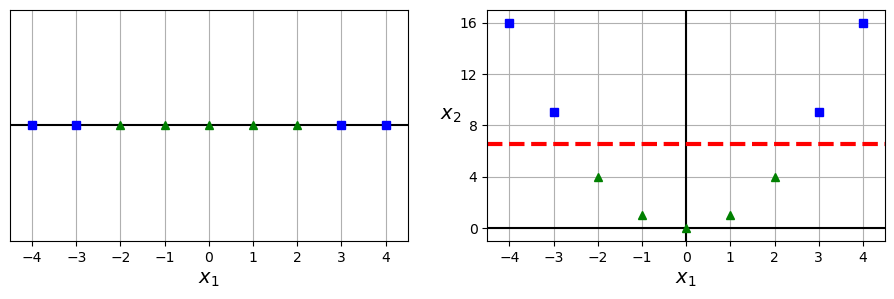

In [17]:
X1D = np.linspace(-4, 4, 9).reshape(-1, 1)
X2D = np.c_[X1D, X1D**2]
y = np.array([0, 0, 1, 1, 1, 1, 1, 0, 0])

plt.figure(figsize=(10, 3))

plt.subplot(121)
plt.grid(True)
plt.axhline(y=0, color='k')
plt.plot(X1D[:, 0][y==0], np.zeros(4), "bs")
plt.plot(X1D[:, 0][y==1], np.zeros(5), "g^")
plt.gca().get_yaxis().set_ticks([])
plt.xlabel("$x_1$")
plt.axis([-4.5, 4.5, -0.2, 0.2])

plt.subplot(122)
plt.grid(True)
plt.axhline(y=0, color='k')
plt.axvline(x=0, color='k')
plt.plot(X2D[:, 0][y==0], X2D[:, 1][y==0], "bs")
plt.plot(X2D[:, 0][y==1], X2D[:, 1][y==1], "g^")
plt.xlabel("$x_1$")
plt.ylabel("$x_2$  ", rotation=0)
plt.gca().get_yaxis().set_ticks([0, 4, 8, 12, 16])
plt.plot([-4.5, 4.5], [6.5, 6.5], "r--", linewidth=3)
plt.axis([-4.5, 4.5, -1, 17])

plt.subplots_adjust(right=1)

plt.show()

* The lefthand plot represents a simple dataset with just one feature,  $x_1$. This dataset is not linearly separable
* If you add a second feature $x_2 = (x_1)^2$, the resulting 2D dataset is perfectly linearly separable

In [18]:
from sklearn.datasets import make_moons
from sklearn.preprocessing import PolynomialFeatures

X, y = make_moons(n_samples=100, noise=0.15, random_state=42)

polynomial_svm_clf = make_pipeline(
    PolynomialFeatures(degree=3),
    StandardScaler(),
    LinearSVC(C=10, max_iter=10_000, dual=True, random_state=42)
)
polynomial_svm_clf.fit(X, y)

Pipeline(steps=[('polynomialfeatures', PolynomialFeatures(degree=3)),
                ('standardscaler', StandardScaler()),
                ('linearsvc',
                 LinearSVC(C=10, dual=True, max_iter=10000, random_state=42))])

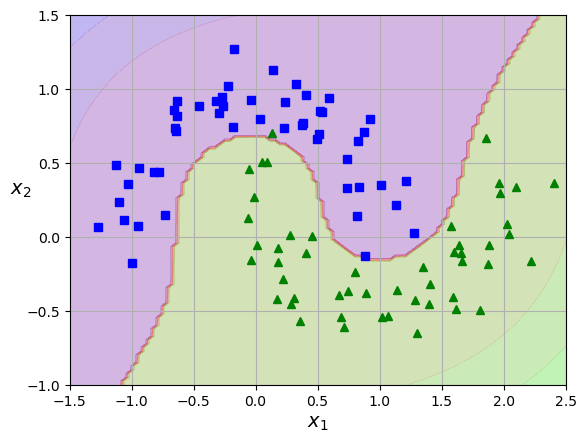

In [19]:
def plot_dataset(X, y, axes):
    plt.plot(X[:, 0][y==0], X[:, 1][y==0], "bs")
    plt.plot(X[:, 0][y==1], X[:, 1][y==1], "g^")
    plt.axis(axes)
    plt.grid(True)
    plt.xlabel("$x_1$")
    plt.ylabel("$x_2$", rotation=0)

def plot_predictions(clf, axes):
    x0s = np.linspace(axes[0], axes[1], 100)
    x1s = np.linspace(axes[2], axes[3], 100)
    x0, x1 = np.meshgrid(x0s, x1s)
    X = np.c_[x0.ravel(), x1.ravel()]
    y_pred = clf.predict(X).reshape(x0.shape)
    y_decision = clf.decision_function(X).reshape(x0.shape)
    plt.contourf(x0, x1, y_pred, cmap=plt.cm.brg, alpha=0.2)
    plt.contourf(x0, x1, y_decision, cmap=plt.cm.brg, alpha=0.1)

plot_predictions(polynomial_svm_clf, [-1.5, 2.5, -1, 1.5])
plot_dataset(X, y, [-1.5, 2.5, -1, 1.5])

plt.show()

### Polynomial Kernel
Adding polynomial features is simple to implemenet and can work great with all sorts of ML algortihms. That said, at a low polynomial degree this method cannot deal with very complex datasets, and with a high polynomial degree it creates a huge number of features, making the model too slow.\
When using SVMs, you can apply an almost miraculous mathematical technique called the *kernel trick*. The kernel trick makes it possible to get the same result as if you had added many polynomial features, even with a very high degree, without actually having to add them. This trick is implemented by the `SVC` class.

In [20]:
from sklearn.svm import SVC
poly_kernel_svm_clf = make_pipeline(StandardScaler(),
                                    SVC(kernel="poly", degree=3, coef0=1, C=5))
poly_kernel_svm_clf.fit(X, y)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('svc', SVC(C=5, coef0=1, kernel='poly'))])

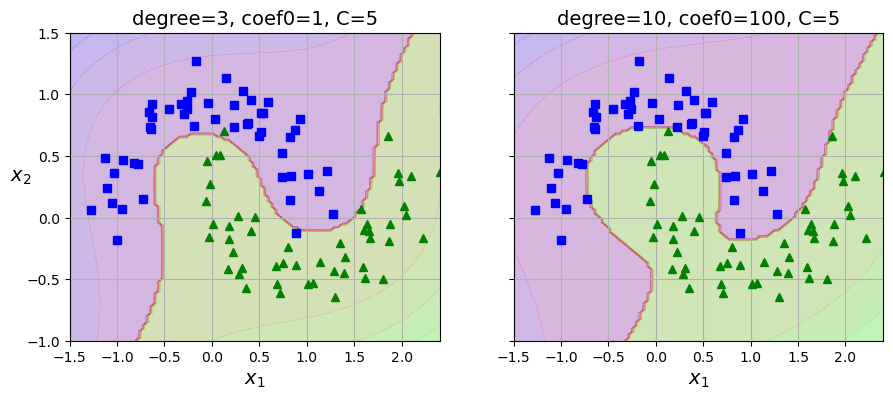

In [21]:
poly100_kernel_svm_clf = make_pipeline(
    StandardScaler(),
    SVC(kernel="poly", degree=10, coef0=100, C=5)
)
poly100_kernel_svm_clf.fit(X, y)

fig, axes = plt.subplots(ncols=2, figsize=(10.5, 4), sharey=True)

plt.sca(axes[0])
plot_predictions(poly_kernel_svm_clf, [-1.5, 2.45, -1, 1.5])
plot_dataset(X, y, [-1.5, 2.4, -1, 1.5])
plt.title("degree=3, coef0=1, C=5")

plt.sca(axes[1])
plot_predictions(poly100_kernel_svm_clf, [-1.5, 2.45, -1, 1.5])
plot_dataset(X, y, [-1.5, 2.4, -1, 1.5])
plt.title("degree=10, coef0=100, C=5")
plt.ylabel("")

plt.show()

If your model is overfitting, you might want to reduce the polynomial degree. Conversely, if it is underfitting, you can try increasing it. The hyperparameter `coef0` controls how much the model is influenced by high-degree terms versus low-degree terms

### Similarity Features
Another technique to tackle nonlinear problems is to add features computed using a similarity function, which measures how much each instance resembles a particular *landmark*.

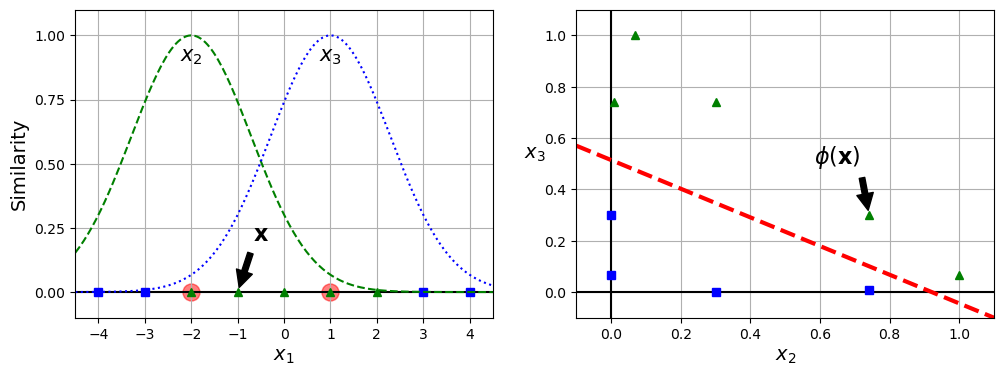

In [23]:
def gaussian_rbf(x, landmark, gamma):
    return np.exp(-gamma * np.linalg.norm(x - landmark, axis=1)**2)

gamma = 0.3

x1s = np.linspace(-4.5, 4.5, 200).reshape(-1, 1)
x2s = gaussian_rbf(x1s, -2, gamma)
x3s = gaussian_rbf(x1s, 1, gamma)

XK = np.c_[gaussian_rbf(X1D, -2, gamma), gaussian_rbf(X1D, 1, gamma)]
yk = np.array([0, 0, 1, 1, 1, 1, 1, 0, 0])

plt.figure(figsize=(10.5, 4))

plt.subplot(121)
plt.grid(True)
plt.axhline(y=0, color='k')
plt.scatter(x=[-2, 1], y=[0, 0], s=150, alpha=0.5, c="red")
plt.plot(X1D[:, 0][yk==0], np.zeros(4), "bs")
plt.plot(X1D[:, 0][yk==1], np.zeros(5), "g^")
plt.plot(x1s, x2s, "g--")
plt.plot(x1s, x3s, "b:")
plt.gca().get_yaxis().set_ticks([0, 0.25, 0.5, 0.75, 1])
plt.xlabel("$x_1$")
plt.ylabel("Similarity")
plt.annotate(
    r'$\mathbf{x}$',
    xy=(X1D[3, 0], 0),
    xytext=(-0.5, 0.20),
    ha="center",
    arrowprops=dict(facecolor='black', shrink=0.1),
    fontsize=16,
)
plt.text(-2, 0.9, "$x_2$", ha="center", fontsize=15)
plt.text(1, 0.9, "$x_3$", ha="center", fontsize=15)
plt.axis([-4.5, 4.5, -0.1, 1.1])

plt.subplot(122)
plt.grid(True)
plt.axhline(y=0, color='k')
plt.axvline(x=0, color='k')
plt.plot(XK[:, 0][yk==0], XK[:, 1][yk==0], "bs")
plt.plot(XK[:, 0][yk==1], XK[:, 1][yk==1], "g^")
plt.xlabel("$x_2$")
plt.ylabel("$x_3$  ", rotation=0)
plt.annotate(
    r'$\phi\left(\mathbf{x}\right)$',
    xy=(XK[3, 0], XK[3, 1]),
    xytext=(0.65, 0.50),
    ha="center",
    arrowprops=dict(facecolor='black', shrink=0.1),
    fontsize=16,
)
plt.plot([-0.1, 1.1], [0.57, -0.1], "r--", linewidth=3)
plt.axis([-0.1, 1.1, -0.1, 1.1])
    
plt.subplots_adjust(right=1)

plt.show()

Take $x_1 = -1$ as an example. It is located at a distance of 1 from the first landmark and 2 from the second landmark. Therefore, its new features are $x_2 = \exp(-0.3\times1^2) \approx 0.74$ and $x_3 = \exp(-0.3\times2^2) \approx 0.30$.\
The plot on the right side shows the transformed dataset (dropping the original features). It is now linearly separable.

To select the landmarks, we can create a landmark at the location of each and every instance in the dataset. Doing that creates many dimensions and thus increase the chances that the transformed training set will be linearly separable. The downside is that a training set with $m$ instances and $n$ features gets transformed into a training set with $m$ instances and $m$ features (assuming you drop the original features). If your training set is very large, you end up with an equally large number of features.

### Gaussian RBF Kernel

In [24]:
rbf_kernel_svm_clf = make_pipeline(StandardScaler(),
                                   SVC(kernel="rbf", gamma=5, C=0.001))
rbf_kernel_svm_clf.fit(X, y)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('svc', SVC(C=0.001, gamma=5))])

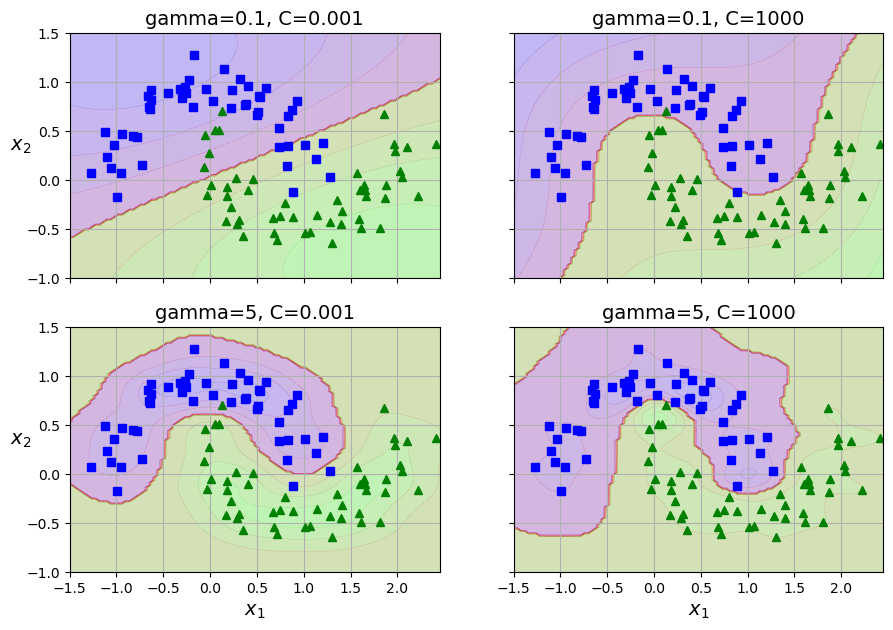

In [25]:
from sklearn.svm import SVC

gamma1, gamma2 = 0.1, 5
C1, C2 = 0.001, 1000
hyperparams = (gamma1, C1), (gamma1, C2), (gamma2, C1), (gamma2, C2)

svm_clfs = []
for gamma, C in hyperparams:
    rbf_kernel_svm_clf = make_pipeline(
        StandardScaler(),
        SVC(kernel="rbf", gamma=gamma, C=C)
    )
    rbf_kernel_svm_clf.fit(X, y)
    svm_clfs.append(rbf_kernel_svm_clf)

fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10.5, 7), sharex=True, sharey=True)

for i, svm_clf in enumerate(svm_clfs):
    plt.sca(axes[i // 2, i % 2])
    plot_predictions(svm_clf, [-1.5, 2.45, -1, 1.5])
    plot_dataset(X, y, [-1.5, 2.45, -1, 1.5])
    gamma, C = hyperparams[i]
    plt.title(f"gamma={gamma}, C={C}")
    if i in (0, 1):
        plt.xlabel("")
    if i in (1, 3):
        plt.ylabel("")

plt.show()

Increasing `gamma` makes the bell-shaped curve narrower. As a result, each instance's range of influence is smaller: the decision boundary ends up being more irregular, wiggling around individual instances. Conversely, a small `gamma` value makes the bell-shape curve wider: instances have a larger range of influence, and the decision boundary ends up smoother. So $\gamma$ acts like a regularization hyperparameter: If your model is overfitting, you should reduce $\gamma$, and vice versa (similar to the `C` hyperparameter)

**NOTE:** Always try the linear kernel first. The `LinearSVC` class is much faster than `SVC(kernel="linear")`, especially if the training set is very large. If it is not too large, you should try kernelized SVMs, starting with the Gaussian RBF kernel; it often works really well.

## SVM Classes and Computational Complexity
* The `LinearSVC` class is based on the `liblinear` library
    *  implements an optimized algorithm for linear SVMs.
    *  It doesn't support the kernel trick, but it scales almost linearly with the number of training instances and the number of features.
    *  Its training time complexity is roughly $O(m\times n)$. The algorithm takes longer if you require very high precision. This is controlled by the tolerance hyperparameter $\epsilon$ (called `tol` in Scikit-Learn).
* The `SVC` class is based on the `libsvm` library
    * implements an algorithm that supports the kernel trick.
    * The training time complexity is usually between $O(m^2\times n)$ and $O(m^3\times n)$. This means that it gets dreadfully slow when the number of training instances get large, so this algorithm is best for small or medium-sized nonlinear training sets.
    * It scales well with the number of features, especially with sparse features. In this case, the algorithm scales roughly with the average number of nonzero features per instance.
* The `SGDClassifier` class
    * It also performs large margin classification by default, and its hyperparameter, especially the regularization hyperparameters `alpha` and `penalty`, and the `learning_rate` can be adjusted to produce similar results as the linear SVMs.
    * You can use it to train a model on a large dataset that does not fit in RAM (out-of-core learning).
    * Moreover, it scales very well, as its computational complexity is $O(m\times n)$

## SVM Regression
To use SVMs for regression instead of classification, the trick is to tweak the objective:
* Instead of trying to fit the largest possible street between two classes while limiting margin violations, SVM regression tries to fit as many instances as possible on the street while limiting margin violations (i.e., instances *off* the street)
* The width of the street is controlled by a hyperparameter $\epsilon$

In [27]:
from sklearn.svm import LinearSVR

np.random.seed(42)
X = 2 * np.random.rand(50, 1)
y = 4 + 3 * X[:, 0] + np.random.randn(50)

svm_reg = make_pipeline(StandardScaler(),
                        LinearSVR(epsilon=0.5, dual=True, random_state=42))
svm_reg.fit(X, y)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('linearsvr',
                 LinearSVR(dual=True, epsilon=0.5, random_state=42))])

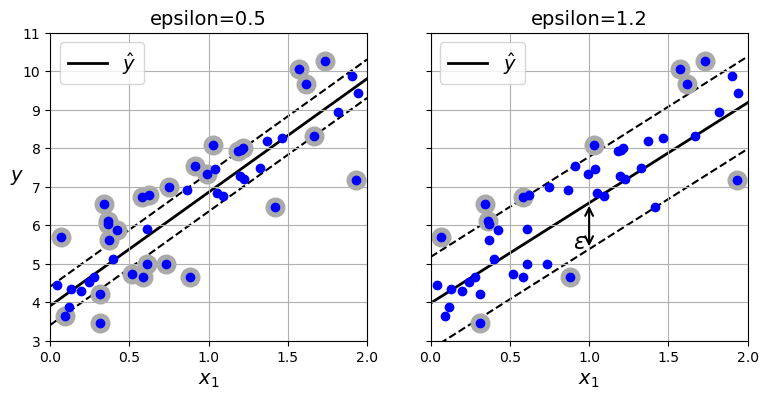

In [28]:
def find_support_vectors(svm_reg, X, y):
    y_pred = svm_reg.predict(X)
    epsilon = svm_reg[-1].epsilon
    off_margin = np.abs(y - y_pred) >= epsilon
    return np.argwhere(off_margin)

def plot_svm_regression(svm_reg, X, y, axes):
    x1s = np.linspace(axes[0], axes[1], 100).reshape(100, 1)
    y_pred = svm_reg.predict(x1s)
    epsilon = svm_reg[-1].epsilon
    plt.plot(x1s, y_pred, "k-", linewidth=2, label=r"$\hat{y}$", zorder=-2)
    plt.plot(x1s, y_pred + epsilon, "k--", zorder=-2)
    plt.plot(x1s, y_pred - epsilon, "k--", zorder=-2)
    plt.scatter(X[svm_reg._support], y[svm_reg._support], s=180,
                facecolors='#AAA', zorder=-1)
    plt.plot(X, y, "bo")
    plt.xlabel("$x_1$")
    plt.legend(loc="upper left")
    plt.axis(axes)

svm_reg2 = make_pipeline(StandardScaler(),
                         LinearSVR(epsilon=1.2, dual=True, random_state=42))
svm_reg2.fit(X, y)

svm_reg._support = find_support_vectors(svm_reg, X, y)
svm_reg2._support = find_support_vectors(svm_reg2, X, y)

eps_x1 = 1
eps_y_pred = svm_reg2.predict([[eps_x1]])

fig, axes = plt.subplots(ncols=2, figsize=(9, 4), sharey=True)
plt.sca(axes[0])
plot_svm_regression(svm_reg, X, y, [0, 2, 3, 11])
plt.title(f"epsilon={svm_reg[-1].epsilon}")
plt.ylabel("$y$", rotation=0)
plt.grid()
plt.sca(axes[1])
plot_svm_regression(svm_reg2, X, y, [0, 2, 3, 11])
plt.title(f"epsilon={svm_reg2[-1].epsilon}")
plt.annotate(
        '', xy=(eps_x1, eps_y_pred), xycoords='data',
        xytext=(eps_x1, eps_y_pred - svm_reg2[-1].epsilon),
        textcoords='data', arrowprops={'arrowstyle': '<->', 'linewidth': 1.5}
    )
plt.text(0.90, 5.4, r"$\epsilon$", fontsize=16)
plt.grid()

plt.show()

Reducing $\epsilon$ increases the number of support vectors, which regularizes the model. Moreover, if you add more training instances within the margin, it will not affect the model's predictions; thus, the model is said to be $\epsilon-$*insensitive*

To tackle nonlinear regression tasks, you can use a kernelized SVM model. 

In [29]:
from sklearn.svm import SVR

# these 3 lines generate a simple quadratic dataset
np.random.seed(42)
X = 2 * np.random.rand(50, 1) - 1
y = 0.2 + 0.1 * X[:, 0] + 0.5 * X[:, 0] ** 2 + np.random.randn(50) / 10

svm_poly_reg = make_pipeline(StandardScaler(),
                             SVR(kernel="poly", degree=2, C=0.01, epsilon=0.1))
svm_poly_reg.fit(X, y)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('svr', SVR(C=0.01, degree=2, kernel='poly'))])

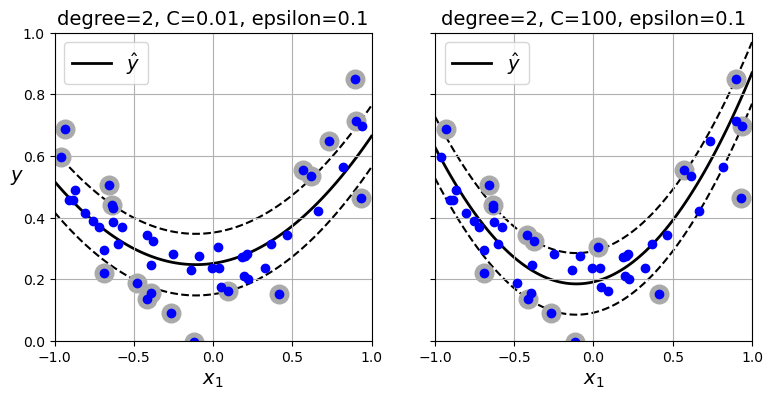

In [30]:
svm_poly_reg2 = make_pipeline(StandardScaler(),
                             SVR(kernel="poly", degree=2, C=100))
svm_poly_reg2.fit(X, y)

svm_poly_reg._support = find_support_vectors(svm_poly_reg, X, y)
svm_poly_reg2._support = find_support_vectors(svm_poly_reg2, X, y)

fig, axes = plt.subplots(ncols=2, figsize=(9, 4), sharey=True)
plt.sca(axes[0])
plot_svm_regression(svm_poly_reg, X, y, [-1, 1, 0, 1])
plt.title(f"degree={svm_poly_reg[-1].degree}, "
          f"C={svm_poly_reg[-1].C}, "
          f"epsilon={svm_poly_reg[-1].epsilon}")
plt.ylabel("$y$", rotation=0)
plt.grid()

plt.sca(axes[1])
plot_svm_regression(svm_poly_reg2, X, y, [-1, 1, 0, 1])
plt.title(f"degree={svm_poly_reg2[-1].degree}, "
          f"C={svm_poly_reg2[-1].C}, "
          f"epsilon={svm_poly_reg2[-1].epsilon}")
plt.grid()
plt.show()

There is some regularization in the left plot (small `C` value), and much less in the right plot (large `C` value)

# Practice

## 1. 
**Fundamental idea behind support vector machine**\
To fit the widest possible "street" between the classes. In other words, the goal is to have the largest possible margin between the decision boundary that separates the two classes and the training instances. When performing *soft margin classification*, the SVM is trying to fit the widest possible "street" while limiting the *margin violation* (i.e., a few instances end up in the middle of the street or are misclassifier). Another key idea is to use kernels when training on nonlinear datasets. SVMs can also be tweaked to perform linear and nonlinear regression, as well as novelty detection

## 2. 
**Support Vector**\
any instance located on the "street", including its border. The decision boundary is entirely determined by the support vectors. Any instance that is not a support vector (i.e., off the street) has no impact at all; you could remove them, add more instances, or move them around, as long as they stay off the street they won't affect the decision boundary. Computing predictions with a kernelized SVM only involves the support vectors, not the whole training set

## 3. 
**Why is it important to scale the inputs when using SVMs?**\
Because SVMs try to fit the widest possible "street" between the classes, so if the training set is not scaled, the SVM will tend to neglect small features.

## 4. 
**Can an SVM classifier output a confidence score when it classifies an instance? what about a probability**\
You can use `decision_function()` method to get the confidence scores. The score represents the distance between the instance and the boundary. If the distance is positive, then it is part of `True`, negative is part of `False`, and zero means the score is on the decision boundary. Unfortunately, these scores cannot be directly converted into an estimation of the class probability. If you set `probability=True` when creating an `SVC`, then at the end of the training it will use 5-fold cross-validation to generate out-of-sample scores for the training samples, and it will train a `LogisticRegression` model to map these scores to estimated probabilities. The `predict_proba()` and `predict_log_proba()` methods will then be available.

## 5. 
**How can you choose between `LinearSVC`, `SVC`, and `SGDClassifier`**\
All three classes can be used for large-margin linear classification. The `SVC` also supports the kernel trick, which makes it capable of handling nonlinear problems. However, the `SVC` class doesn't scale well to datasets with many instances. It does scale well to a large number of features though. The `LinearSVC` class implement an optimized algorithm for linear SVMs, while `SGDClassifier` uses Stochastic Gradient Descent. Depending on the dataset, `LinearSVC` may be a bit faster than `SGDClassifier`, but not always, and `SGDClassifier` is more flexible, and it also supports incremental learning.

## 6. 
**Say you've trained an SVM classifier with an RBF Kernel, but it seems to underfit the training set. Should you increase or decrease $\gamma$(`gamma`)? What about `C`?**\
If the model underfit the training set, there might be too much regularization. To decrease, yo should increase `gamma` or `C` (or both).

## 7. 
**What does it mean for a model to be $\epsilon$-insensitive?**\
A Regression SVM model tries to fit as many instances within a small margin around its predictions. If you add instances within this margin, the model will not be affected at all.

## 8. 
**What is the point of using the kernel trick?**\
The kernel trick is a mathematical technique that makes it possible to train a nonlinear SVM model. The resulting model is equivalent to mapping the inputs to another space using a nonlinear transformation, then training a linear SVM on the resulting high-dimensional inputs. The kernel tricks gives the same result without having to transform the inputs at all.

## 9. 
**Train a `LinearSVC` on a linearly separable dataset. Then train an `SVC` and `SGDClassifier` on the same dataset.**


In [97]:
from sklearn import datasets

iris = datasets.load_iris(as_frame=True)
X = iris.data[["petal length (cm)", "petal width (cm)"]].values
y = iris.target

setosa_or_versicolor = (y==0) | (y==1)
X = X[setosa_or_versicolor]
y = y[setosa_or_versicolor]

from sklearn.svm import LinearSVC, SVC
from sklearn.linear_model import SGDClassifier
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

C = 1
alpha = 0.05

lin_clf = LinearSVC(loss="hinge", C=C, random_state=42).fit(X_scaled, y)
svc_clf = SVC(kernel="linear", C=C, random_state=42).fit(X_scaled, y)
sgd_clf = SGDClassifier(alpha=alpha, random_state=42).fit(X_scaled, y)

In [98]:
lin_clf.coef_

array([[1.0607458 , 1.00177835]])

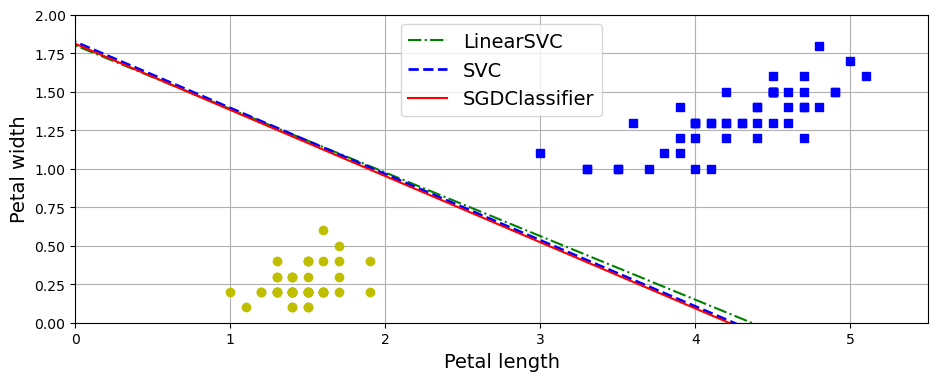

In [99]:
def compute_decision_boundary(model):
    w = -model.coef_[0, 0] / model.coef_[0, 1]
    b = -model.intercept_[0] / model.coef_[0, 1]
    return scaler.inverse_transform([[-10, -10 * w + b], [10, 10 * w + b]])

lin_line = compute_decision_boundary(lin_clf)
svc_line = compute_decision_boundary(svc_clf)
sgd_line = compute_decision_boundary(sgd_clf)

# Plot all three decision boundaries
plt.figure(figsize=(11, 4))
plt.plot(lin_line[:, 0], lin_line[:, 1], "g-.", label="LinearSVC")
plt.plot(svc_line[:, 0], svc_line[:, 1], "b--", linewidth=2, label="SVC")
plt.plot(sgd_line[:, 0], sgd_line[:, 1], "r-", label="SGDClassifier")
plt.plot(X[:, 0][y==1], X[:, 1][y==1], "bs") # label="Iris versicolor"
plt.plot(X[:, 0][y==0], X[:, 1][y==0], "yo") # label="Iris setosa"
plt.xlabel("Petal length")
plt.ylabel("Petal width")
plt.legend(loc="upper center")
plt.axis([0, 5.5, 0, 2])
plt.grid()

plt.show()

## 10. 
**Train an SVM classifier on the wine dataset which you can load using `sklearn.datasets.load_wine()`. This dataset contains the chemical analysis of 178 wine samples produced by 3 different cultivators: the goal is to rain a classification model capable of predicting the cultivator based on the wine's chemical analysis. Since SVM classifiers are binary classifier, you will need to use one-versus-all to classify all three classes. What accuracy can you reach?**

In [90]:
from sklearn.datasets import load_wine

wine = load_wine(as_frame=True)
print(wine.DESCR)

.. _wine_dataset:

Wine recognition dataset
------------------------

**Data Set Characteristics:**

:Number of Instances: 178
:Number of Attributes: 13 numeric, predictive attributes and the class
:Attribute Information:
    - Alcohol
    - Malic acid
    - Ash
    - Alcalinity of ash
    - Magnesium
    - Total phenols
    - Flavanoids
    - Nonflavanoid phenols
    - Proanthocyanins
    - Color intensity
    - Hue
    - OD280/OD315 of diluted wines
    - Proline
    - class:
        - class_0
        - class_1
        - class_2

:Summary Statistics:

============================= ==== ===== ======= =====
                                Min   Max   Mean     SD
============================= ==== ===== ======= =====
Alcohol:                      11.0  14.8    13.0   0.8
Malic Acid:                   0.74  5.80    2.34  1.12
Ash:                          1.36  3.23    2.36  0.27
Alcalinity of Ash:            10.6  30.0    19.5   3.3
Magnesium:                    70.0 162.0    99.7  14.3

In [94]:
from sklearn.model_selection import train_test_split

X = wine.data
y = wine.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [95]:
X_train.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
27,13.30,1.72,2.14,17.0,94.0,2.40,2.19,0.27,1.35,3.95,1.02,2.77,1285.0
138,13.49,3.59,2.19,19.5,88.0,1.62,0.48,0.58,0.88,5.70,0.81,1.82,580.0
46,14.38,3.59,2.28,16.0,102.0,3.25,3.17,0.27,2.19,4.90,1.04,3.44,1065.0
118,12.77,3.43,1.98,16.0,80.0,1.63,1.25,0.43,0.83,3.40,0.70,2.12,372.0
33,13.76,1.53,2.70,19.5,132.0,2.95,2.74,0.50,1.35,5.40,1.25,3.00,1235.0


In [96]:
y_train.head()

27     0
138    2
46     0
118    1
33     0
Name: target, dtype: int64

In [108]:
from sklearn.preprocessing import StandardScaler
from sklearn.svm import LinearSVC, SVC
from sklearn.linear_model import SGDClassifier

scaler = StandardScaler()
scaled_X_train = scaler.fit_transform(X_train)
scaled_X_test = scaler.transform(X_test)

lin_clf = LinearSVC(C=1, random_state=42).fit(scaled_X_train, y_train)
svc_clf = SVC(kernel="linear", C=1).fit(scaled_X_train, y_train)
sgd_clf = SGDClassifier(alpha=0.05, random_state=42).fit(scaled_X_train, y_train)

In [111]:
lin_clf.score(scaled_X_train, y_train), svc_clf.score(scaled_X_train, y_train), sgd_clf.score(scaled_X_train, y_train)

(1.0, 1.0, 1.0)

In [109]:
lin_clf.score(scaled_X_test, y_test), svc_clf.score(scaled_X_test, y_test), sgd_clf.score(scaled_X_test, y_test)

(1.0, 0.9722222222222222, 1.0)

In [112]:
from sklearn.model_selection import cross_val_score

cross_val_score(lin_clf, scaled_X_train, y_train).mean()

np.float64(0.9790640394088671)

In [113]:
cross_val_score(svc_clf, scaled_X_train, y_train).mean()

np.float64(0.9647783251231529)

In [114]:
cross_val_score(sgd_clf, scaled_X_train, y_train).mean()

np.float64(0.993103448275862)

`SGDClassifier` performs best with accuracy of 99.31%, followed by`LinearSVC` 97.90%, `SVC` 96.48%

## 11.
**Train and fine-tune an SVM regressor on the California housing dataset. You can use the original dataset rather than the tweaked version we used in Chapter 2, which you can load using `sklearn.datasets.fetch_california_housing()`. The targets represent hundreds of thousands of dollars. Since there over 20,000 instances, SVMs can be slow, so for hyperparameter tuning you should use far fewer instances (e.g., 2,000) to test many more hyperparameter combinations. What is your best model's RMSE?**

In [135]:
from sklearn.datasets import fetch_california_housing

housing = fetch_california_housing(as_frame=True)
X = housing.data
y = housing.target
print(housing.DESCR)

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

:Number of Instances: 20640

:Number of Attributes: 8 numeric, predictive attributes and the target

:Attribute Information:
    - MedInc        median income in block group
    - HouseAge      median house age in block group
    - AveRooms      average number of rooms per household
    - AveBedrms     average number of bedrooms per household
    - Population    block group population
    - AveOccup      average number of household members
    - Latitude      block group latitude
    - Longitude     block group longitude

:Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
https://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html

The target variable is the median house value for California districts,
expressed in hundreds of thousands of dollars ($100,000).

This dataset was derived from the 1990 U.S. census, using one row per ce

In [141]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import LinearSVR, SVR

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
scaler = StandardScaler()
scaled_X_train = scaler.fit_transform(X_train)
scaled_X_test = scaler.transform(X_test)

lin_svr = LinearSVR(max_iter=5000, random_state=42, dual=True)
svr_reg = SVR()
lin_svr.fit(scaled_X_train, y_train)
svr_reg.fit(scaled_X_train[:2000], y_train[:2000])

SVR()

In [146]:
from sklearn.metrics import root_mean_squared_error
y_pred_lin = lin_svr.predict(scaled_X_train)
y_pred_svg = svr_reg.predict(scaled_X_train)
rmse_lin = root_mean_squared_error(y_train, y_pred_lin)
rmse_svr = root_mean_squared_error(y_train, y_pred_svg)
rmse_lin, rmse_svr

(np.float64(1.1643683964096088), np.float64(0.634798877407119))

`LinearSVR` makes an error of about \$100,000, while `SVR` makes an error of about \$63,000

In [154]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import loguniform, uniform

param_distrib = {
    "gamma": loguniform(0.001, 0.1),
    "C": uniform(1, 10)
}
rnd_search_cv = RandomizedSearchCV(svr_reg, param_distrib, n_iter=100, cv=5, random_state=42, verbose=2)
rnd_search_cv.fit(scaled_X_train[:2000], y_train[:2000])

Fitting 5 folds for each of 100 candidates, totalling 500 fits
[CV] END .....C=4.745401188473625, gamma=0.07969454818643935; total time=   0.3s
[CV] END .....C=4.745401188473625, gamma=0.07969454818643935; total time=   0.3s
[CV] END .....C=4.745401188473625, gamma=0.07969454818643935; total time=   0.3s
[CV] END .....C=4.745401188473625, gamma=0.07969454818643935; total time=   0.3s
[CV] END .....C=4.745401188473625, gamma=0.07969454818643935; total time=   0.3s
[CV] END .....C=8.31993941811405, gamma=0.015751320499779727; total time=   0.3s
[CV] END .....C=8.31993941811405, gamma=0.015751320499779727; total time=   0.2s
[CV] END .....C=8.31993941811405, gamma=0.015751320499779727; total time=   0.3s
[CV] END .....C=8.31993941811405, gamma=0.015751320499779727; total time=   0.2s
[CV] END .....C=8.31993941811405, gamma=0.015751320499779727; total time=   0.2s
[CV] END ....C=2.560186404424365, gamma=0.002051110418843397; total time=   0.2s
[CV] END ....C=2.560186404424365, gamma=0.0020

RandomizedSearchCV(cv=5, estimator=SVR(), n_iter=100,
                   param_distributions={'C': <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x000002304AF4DCD0>,
                                        'gamma': <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x000002303CF713D0>},
                   random_state=42, verbose=2)

In [155]:
rnd_search_cv.best_estimator_

SVR(C=np.float64(4.63629602379294), gamma=np.float64(0.08781408196485979))

In [156]:
-cross_val_score(rnd_search_cv.best_estimator_, scaled_X_train, y_train, scoring="neg_root_mean_squared_error")

array([0.57296958, 0.5822566 , 0.59144648, 0.57706416, 0.57594123])

In [158]:
y_pred = rnd_search_cv.best_estimator_.predict(scaled_X_test)
rmse = root_mean_squared_error(y_test, y_pred)
rmse

np.float64(0.5997111222620418)

So, SVMs worked very well on the wine dataset, but not so much on the California Housing dataset (error $\approx$ $60,000)